# Лабораторна робота №2
студента групи ОМ-2  
Пишка Андрія Персептроновича  
Варіант 11

##Постановка задачі

У даній лабораторній роботі треба побудувати модель нейронної мережі типу
Feed-forward, що апроксимує функцію

$$
y(x) = \frac{(e^x - e^{-x}) \cdot \cos(x)}{(e^x + e^{-x})},
$$

на інтервалі $[− 5, 5]$.

В якості середовища виконання лабораторної роботи було обрано мову програмування Python та середовище програмування Jypiter Notebook.

##Теоретичні відомості

Апроксимація полягає у заміні певних математичних структур іншими, які є наближеними до оригінальних за певними критеріями. У цьому контексті, під апроксимацією розуміється процес заміни однієї функції іншою, яка з певного погляду вважається більш відповідною за оригінальну.

Апроксимація виконується за допомогою нейронних мереж. Під терміном "штучні нейронні мережі" розуміють обчислювальні системи, що імітують прості біологічні механізми, асоційовані з функціонуванням мозку людини. Ці системи є розподіленими та паралельними, мають здатність до адаптації та навчання через аналіз позитивних та негативних зворотних зв'язків.

Основним елементом у цих мережах є штучний нейрон, іменований так на честь свого біологічного аналога. На сьогодні було розроблено та досліджено численні моделі нейронів та нейронних мереж.

Кожен нейрон містить елементи трьох типів: синапси (множники), суматор і нелінійний перетворювач. Синапси забезпечують зв'язок між нейронами, масштабуючи вхідний сигнал на величину, що відображає інтенсивність з'єднання (вагу синапса). Суматор агрегує сигнали, отримані через синаптичні зв'язки від інших нейронів та зовнішніх входів. Нелінійний перетворювач застосовує нелінійну функцію до результату суматора, відому як функція активації або передавальна функція нейрона, тим самим реалізуючи скалярну функцію векторного аргументу.

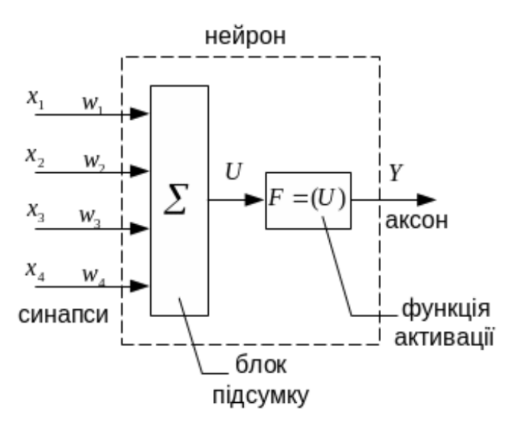

Найбільш поширеними і добре вивченими є тришарові НС, що
складаються з трьох шарів нейронів:

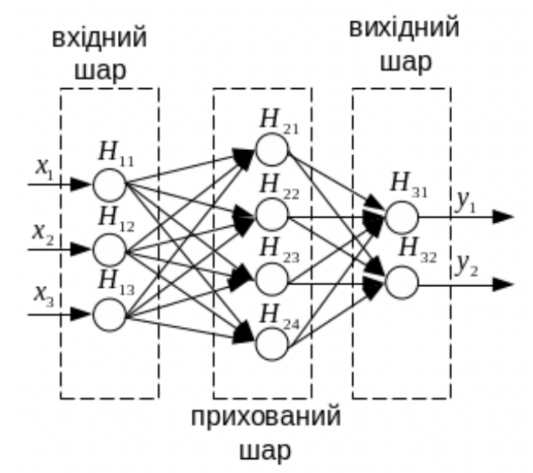

Нейронні мережі відносяться до класу апроксиматорів і «чорних
ящиків», що апроксимують деякі функції вигляду $Y = f(X)$, де $Y$ −
вектор вихідних змінних, а $X$ − вектор вхідних змінних.

Процес навчання НМ виглядає наступним чином:

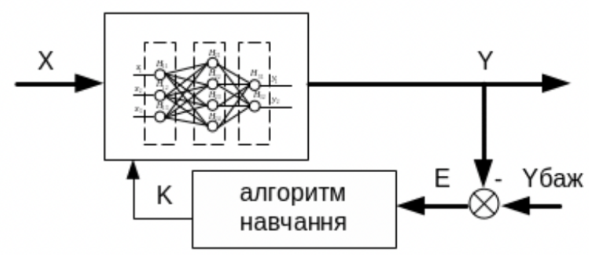

Де $Y_{баж}$ -- бажані значення вихідних сигналів, $E$ -- помилка навчання
мережі, а $K$ -- дії, що її коректують.

## Хід розв’язання поставленої задачі

### Імпортуємо бібліотеки

Спочатку імпортуємо корисні для нас бібліотеки: NumPy, TensorFlow та Matplotlib. Серед них особливого ознайомлення потребує TensorFlow. Це відкрита програмна бібліотека для машинного навчання і глибинного навчання, розроблена компанією Google. Вона надає інструменти для побудови та тренування різних моделей машинного навчання, таких як нейронні мережі. TensorFlow став популярним інструментом в галузі штучного інтелекту і дозволяє використовувати готові моделі або створювати власні для розв'язання різних завдань, таких як класифікація зображень, розпізнавання мови, обробка природної мови, генерація контенту та інші. TensorFlow підтримує різні мови програмування, такі як Python, C++, Java, і може бути використаний як на локальних комп'ютерах, так і в хмарних середовищах.

In [46]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Задамо корисні функції

Фукнція, яку треба апроксимувати

In [47]:
def y(x):
    return (np.exp(x) - np.exp(-x)) * np.cos(x) / (np.exp(x) + np.exp(-x))

Функція, що виводить результати апроксимації

In [48]:
def plotApprox(trainX, trainY, predY):
    plt.figure(figsize=(10, 6))
    plt.plot(trainX, trainY, label='Оригінал', color='limegreen')
    plt.plot(trainX, predY, label='Апроксимація', color='crimson')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.title('Результати апроксимації')
    plt.show()

Функція, що виводить нев'язку на кожному кроці навчання

In [49]:
def plotDeviation(losses):
  plt.figure(figsize=(8, 6))
  plt.plot(losses)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()
  plt.grid(True)
  plt.title('Відхилення результатів')
  plt.show()

### Модель №1
Два шари нейронів:
1.   Прихований, 10 елементів
2.   Вихідний, 1 елемент



####Реалізація

Ініціалізуємо тестову множину

In [50]:
trainX = np.linspace(-5, 5, 1000)
trainY = y(trainX)

Будуємо структуру НМ

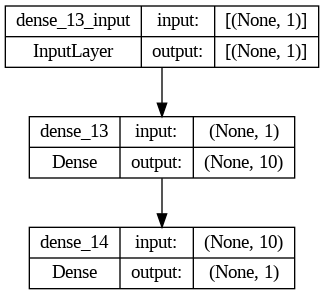

In [51]:
netModel = tf.keras.Sequential([
    # Додавання першого шару Dense (повнозв'язний шар) з 10 нейронами, вхідною формою (1,), та активацією 'relu'
    tf.keras.layers.Dense(10, input_shape=(1,), activation='relu'),
    # Додавання другого шару Dense з 1 нейроном (вихідним шаром)
    tf.keras.layers.Dense(1)])

# Компіляція моделі з використанням оптимізатора 'adam' і функції втрат -- середньо квадр. помилки
netModel.compile(optimizer='adam', loss='mean_squared_error')

# Візуалізуємо структуру моделі
tf.keras.utils.plot_model(netModel, show_shapes=True)

Тренуємо модель на навчальних даних

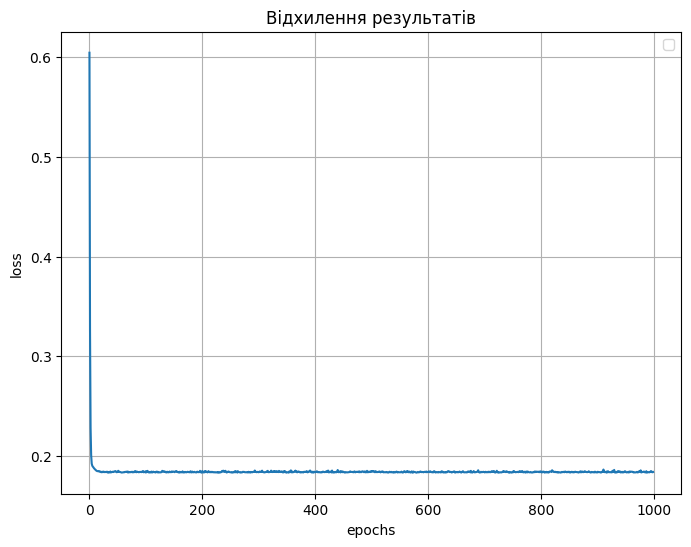

In [52]:
modelHistory = netModel.fit(trainX, trainY, epochs=1000, verbose=0)

# Виводимо графік відхилення результатів на кожному кроці
plotDeviation(modelHistory.history['loss'])

#### Результати

32/32 [==============================] - 0s 840us/step


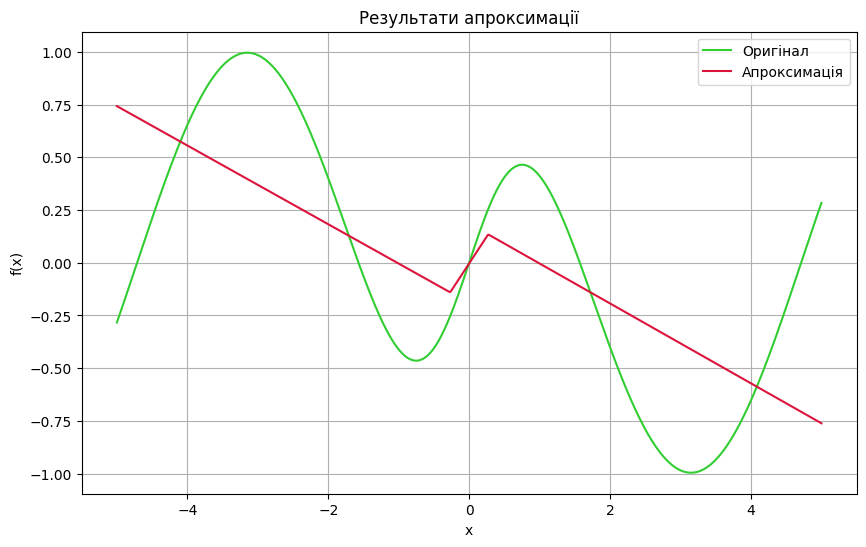

In [53]:
predY = netModel.predict(trainX)
plotApprox(trainX, trainY, predY)

### Модель №2
Три шари нейронів:
1.   Прихований, 10 елементів
2.   Прихований, 15 елементів
3.   Вихідний, 1 елемент

####Реалізація

Ініціалізуємо тестову множину

In [54]:
trainX = np.linspace(-5, 5, 1000)
trainY = y(trainX)

Будуємо структуру НМ

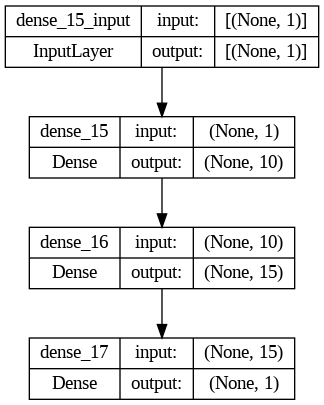

In [55]:
netModel = tf.keras.Sequential([
    # Додавання першого шару Dense (повнозв'язний шар) з 10 нейронами, вхідною формою (1,), та активацією 'relu'
    tf.keras.layers.Dense(10, input_shape=(1,), activation='relu'),
    # Додавання першого шару Dense (повнозв'язний шар) з 15 нейронами, вхідною формою (1,), та активацією 'relu'
    tf.keras.layers.Dense(15, input_shape=(1,), activation='relu'),
    # Додавання другого шару Dense з 1 нейроном (вихідним шаром)
    tf.keras.layers.Dense(1)])

# Компіляція моделі з використанням оптимізатора 'adam' і функції втрат -- середньо квадр. помилки
netModel.compile(optimizer='adam', loss='mean_squared_error')

# Візуалізуємо структуру моделі
tf.keras.utils.plot_model(netModel, show_shapes=True)

Тренуємо модель на навчальних даних

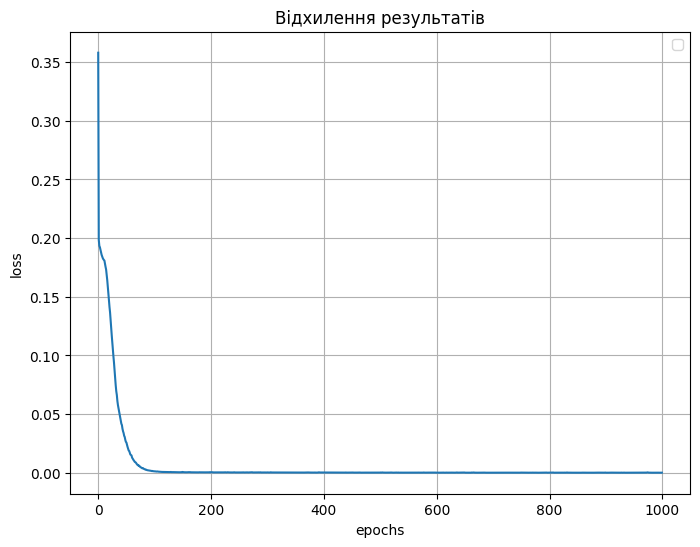

In [56]:
modelHistory = netModel.fit(trainX, trainY, epochs=1000, verbose=0)

# Виводимо графік відхилення результатів на кожному кроці
plotDeviation(modelHistory.history['loss'])

#### Результати

32/32 [==============================] - 0s 790us/step


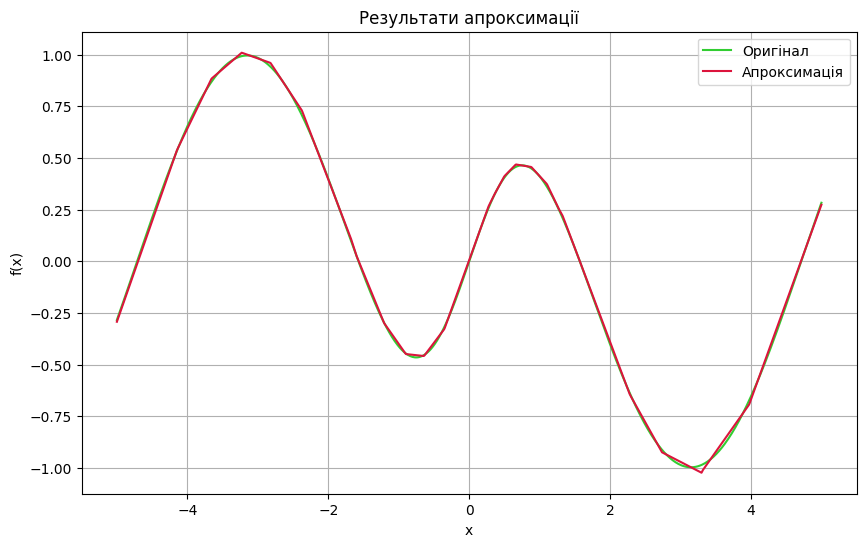

In [57]:
predY = netModel.predict(trainX)
plotApprox(trainX, trainY, predY)

### Модель №3
Чотири шари нейронів:
1.   Прихований, 10 елементів
2.   Прихований, 15 елементів
3.   Прихований, 10 елементів
4.   Вихідний, 1 елемент

####Реалізація

Ініціалізуємо тестову множину

In [58]:
trainX = np.linspace(-5, 5, 1000)
trainY = y(trainX)

Будуємо структуру НМ

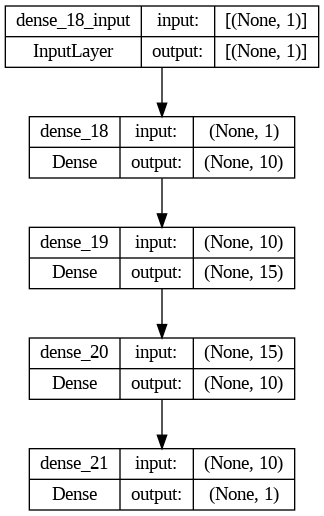

In [59]:
netModel = tf.keras.Sequential([
    # Додавання першого шару Dense (повнозв'язний шар) з 10 нейронами, вхідною формою (1,), та активацією 'relu'
    tf.keras.layers.Dense(10, input_shape=(1,), activation='relu'),
    # Додавання першого шару Dense (повнозв'язний шар) з 15 нейронами, вхідною формою (1,), та активацією 'relu'
    tf.keras.layers.Dense(15, input_shape=(1,), activation='relu'),
    # Додавання першого шару Dense (повнозв'язний шар) з 10 нейронами, вхідною формою (1,), та активацією 'relu'
    tf.keras.layers.Dense(10, input_shape=(1,), activation='relu'),
    # Додавання другого шару Dense з 1 нейроном (вихідним шаром)
    tf.keras.layers.Dense(1)])

# Компіляція моделі з використанням оптимізатора 'adam' і функції втрат -- середньо квадр. помилки
netModel.compile(optimizer='adam', loss='mean_squared_error')

# Візуалізуємо структуру моделі
tf.keras.utils.plot_model(netModel, show_shapes=True)

Тренуємо модель на навчальних даних

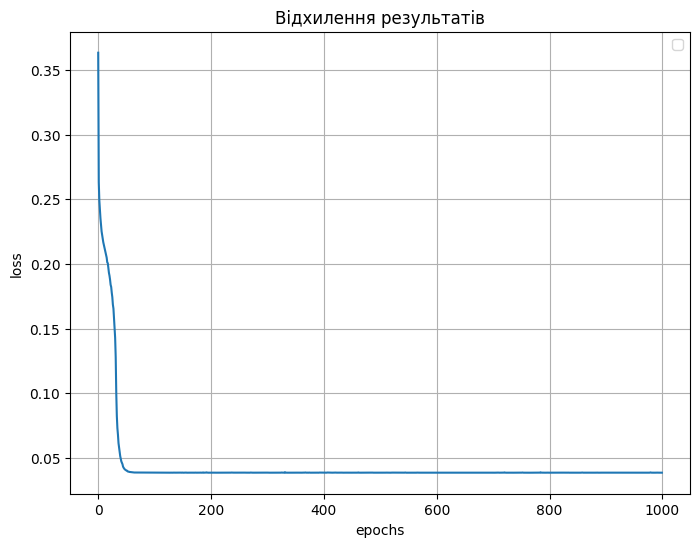

In [60]:
modelHistory = netModel.fit(trainX, trainY, epochs=1000, verbose=0)

# Виводимо графік відхилення результатів на кожному кроці
plotDeviation(modelHistory.history['loss'])

#### Результати

32/32 [==============================] - 0s 940us/step


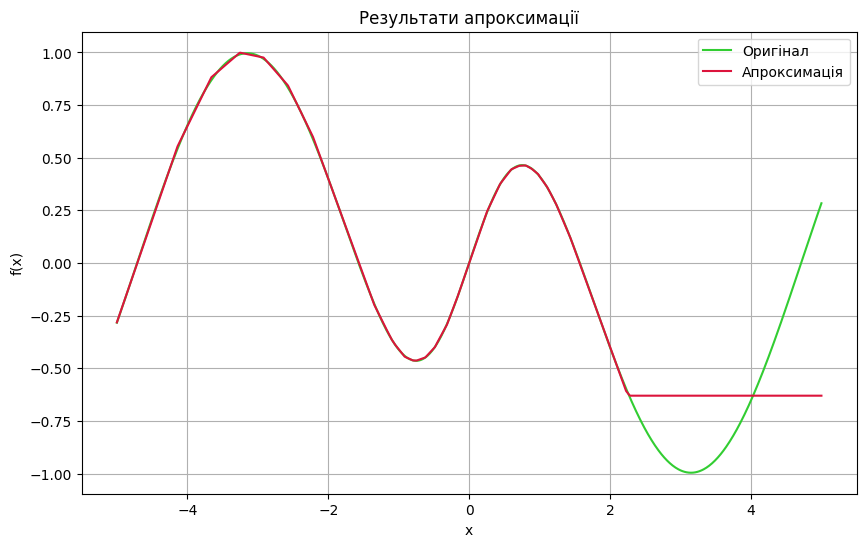

In [61]:
predY = netModel.predict(trainX)
plotApprox(trainX, trainY, predY)

## Висновки

У даній лабораторній роботі було розглянуто роботу примітивних нейронних мереж, які намагалися апроксимувати задану функцію. Найкращого результату апроксимація набула для другої моделі НМ, яка складалася з двох прихованих шарів по 10 та 15 елементів відповідно. У першій моделі наближення було недостатнім, що свідчило про недонавчання НМ. У третьому ж випадку ми можемо побачити перенавчання, коли НМ "тупішає", як на заводі у Форда.

Отримані результати наштовхують на наступні висновки:

1. Правило "Чим більше прихованих шарів, тим краще" не працює.
2. Для отримання найкращого результату варто поекспериментувати з різними можливими архітектурами НМ.
3. В Google працюють розумні люди, які реалізували зручний інструмент TensorFlow для роботи з нейронними мережами.